In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
class plotting_benchmark:
    def __init__ (self, datatype, directory, max_generation, label, repetition, bayesian, bayesian_single, initial_points, top_value, factor = 1):
        self.table = pd.DataFrame(list(range(0, (max_generation+1))), columns = ['Generation'])
        for i in label:
            data = pd.read_csv(str(directory) + str(i) + str(datatype) + '.txt', sep='\t')
            for j in range(repetition):
                self.table[str(i) + 'Raw_' + str(j)] = data['Raw_' + str(j)]         
            self.table[str(i) + 'Relative'] = data['Mean']/top_value
            self.table[str(i) + 'Mean'] = data['Mean'] * factor
            self.table[str(i) + 'STD'] = data['STD']

        self.bayesian = pd.read_csv(str(bayesian) + str(datatype) + '.txt', sep='\t')
        self.bayesian = self.bayesian.iloc[(initial_points-1):].reset_index(drop=True)
        self.bayesian['Generation'] = self.bayesian['Generation'] - initial_points + 1
        self.bayesian['Relative'] = self.bayesian['Mean']/top_value
        self.bayesian_single = pd.read_csv(str(bayesian_single) + str(datatype) + '.txt', sep='\t')
        self.bayesian_single = self.bayesian_single.iloc[(initial_points-1):].reset_index(drop=True)
        self.bayesian_single['Generation'] = self.bayesian_single['Generation'] - initial_points + 1
        self.bayesian_single['Relative'] = self.bayesian_single['Mean']/top_value
        return

In [ ]:
def create_subplot(table_0, table_1, table_2, table_3, x_low, x_high, y_low, y_high, y_label):
    legend = ['HP 1', 'HP 2', 'HP 3', 'HP 4']
    color = ['#cd81b5', '#ffbf4c', '#5db25b', '#6eade1', '#111111']
    
    
    #Making variable
    data = []
    for i in range(4):
        data.append(locals()['table_' + str(i)])

    
    #Plotting
    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize=(7, 6), sharey=True, sharex=True, dpi = 300)
    position = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]
    
    for i in range(4):   
        ax = position[i]
        ax.plot(data[i].table['Generation'].loc[x_low:x_high], data[i].table[str(label[0]) + 'Relative'].loc[0:x_high], label = str(legend[0]), marker = 'o', markersize = 3, linewidth=1, color = color[0])
        ax.plot(data[i].table['Generation'].loc[x_low:x_high], data[i].table[str(label[1]) + 'Relative'].loc[0:x_high], label = str(legend[1]), marker = 'o', markersize = 3, linewidth=1, color = color[1])
        ax.plot(data[i].table['Generation'].loc[x_low:x_high], data[i].table[str(label[2]) + 'Relative'].loc[0:x_high], label = str(legend[2]), marker = 'o', markersize = 3, linewidth=1, color = color[2])
        ax.plot(data[i].table['Generation'].loc[x_low:x_high], data[i].table[str(label[3]) + 'Relative'].loc[0:x_high], label = str(legend[3]), marker = 'o', markersize = 3, linewidth=1, color = color[3])
        ax.plot(data[i].table['Generation'].loc[x_low:x_high], data[i].bayesian['Relative'].loc[0:x_high], label = 'BBO', marker = 'd', markersize = 3, linewidth=1, color = color[4])
        ax.plot(data[i].table['Generation'].loc[x_low:x_high], data[i].bayesian_single['Relative'].loc[0:x_high], label = 'SBO', marker = 'd', markersize = 3, linewidth=1, linestyle = '--', color = color[4])
        ax.set_xticks(np.arange((x_low), (x_high+1), 3), fontsize = 10)
        ax.set_ylim(y_low, y_high)
        ax.text(0.87, 0.05, model_title[i], horizontalalignment='center', transform=ax.transAxes, fontsize = 10)
        if i == 3:
            ax.legend(ncol = 2, loc = 'center right', bbox_to_anchor=(0.3, -0.35))
        
    #Labelling
    plt.text(-4.3, 0.02, s='Generation', fontsize = 11)
    plt.suptitle('Best Activity Found (a.u.)', x = 0.06, y= 0.67, fontsize = 11, rotation = 90)
    plt.rc('ytick', labelsize=10)

    plt.subplots_adjust(wspace=0.07, hspace=0.05)
    plt.show()
    return

In [ ]:
#Creating label name
label = []
for i in range(4):
    label.append('PSO_' + str(i) + '_')

#Create variables
directory = ['model1', 'model2', 'model3', 'model4']
maximum_activity = [0.163182, 0.213387, 0.167831, 1.039926]
initial_points = [1, 1, 1, 1]

#Create data
for i in range(4):
    locals()['PSO_data_' + str(i)] = plotting_benchmark(datatype = 'max_value',
                                                        directory = '../result/benchmark_activity/PSO/' + directory[i] + '/Summary/',
                                                        max_generation = 20,
                                                        label = label,
                                                        repetition = 5,
                                                        bayesian = '../result/benchmark_activity/BO/' + directory[i] + '/batch/Summary/result_',
                                                        bayesian_single = '../result/benchmark_activity/BO/' + directory[i] + '/single/Summary/result_',
                                                        initial_points = initial_points[i],
                                                        top_value = maximum_activity[i],
                                                        factor = 1)

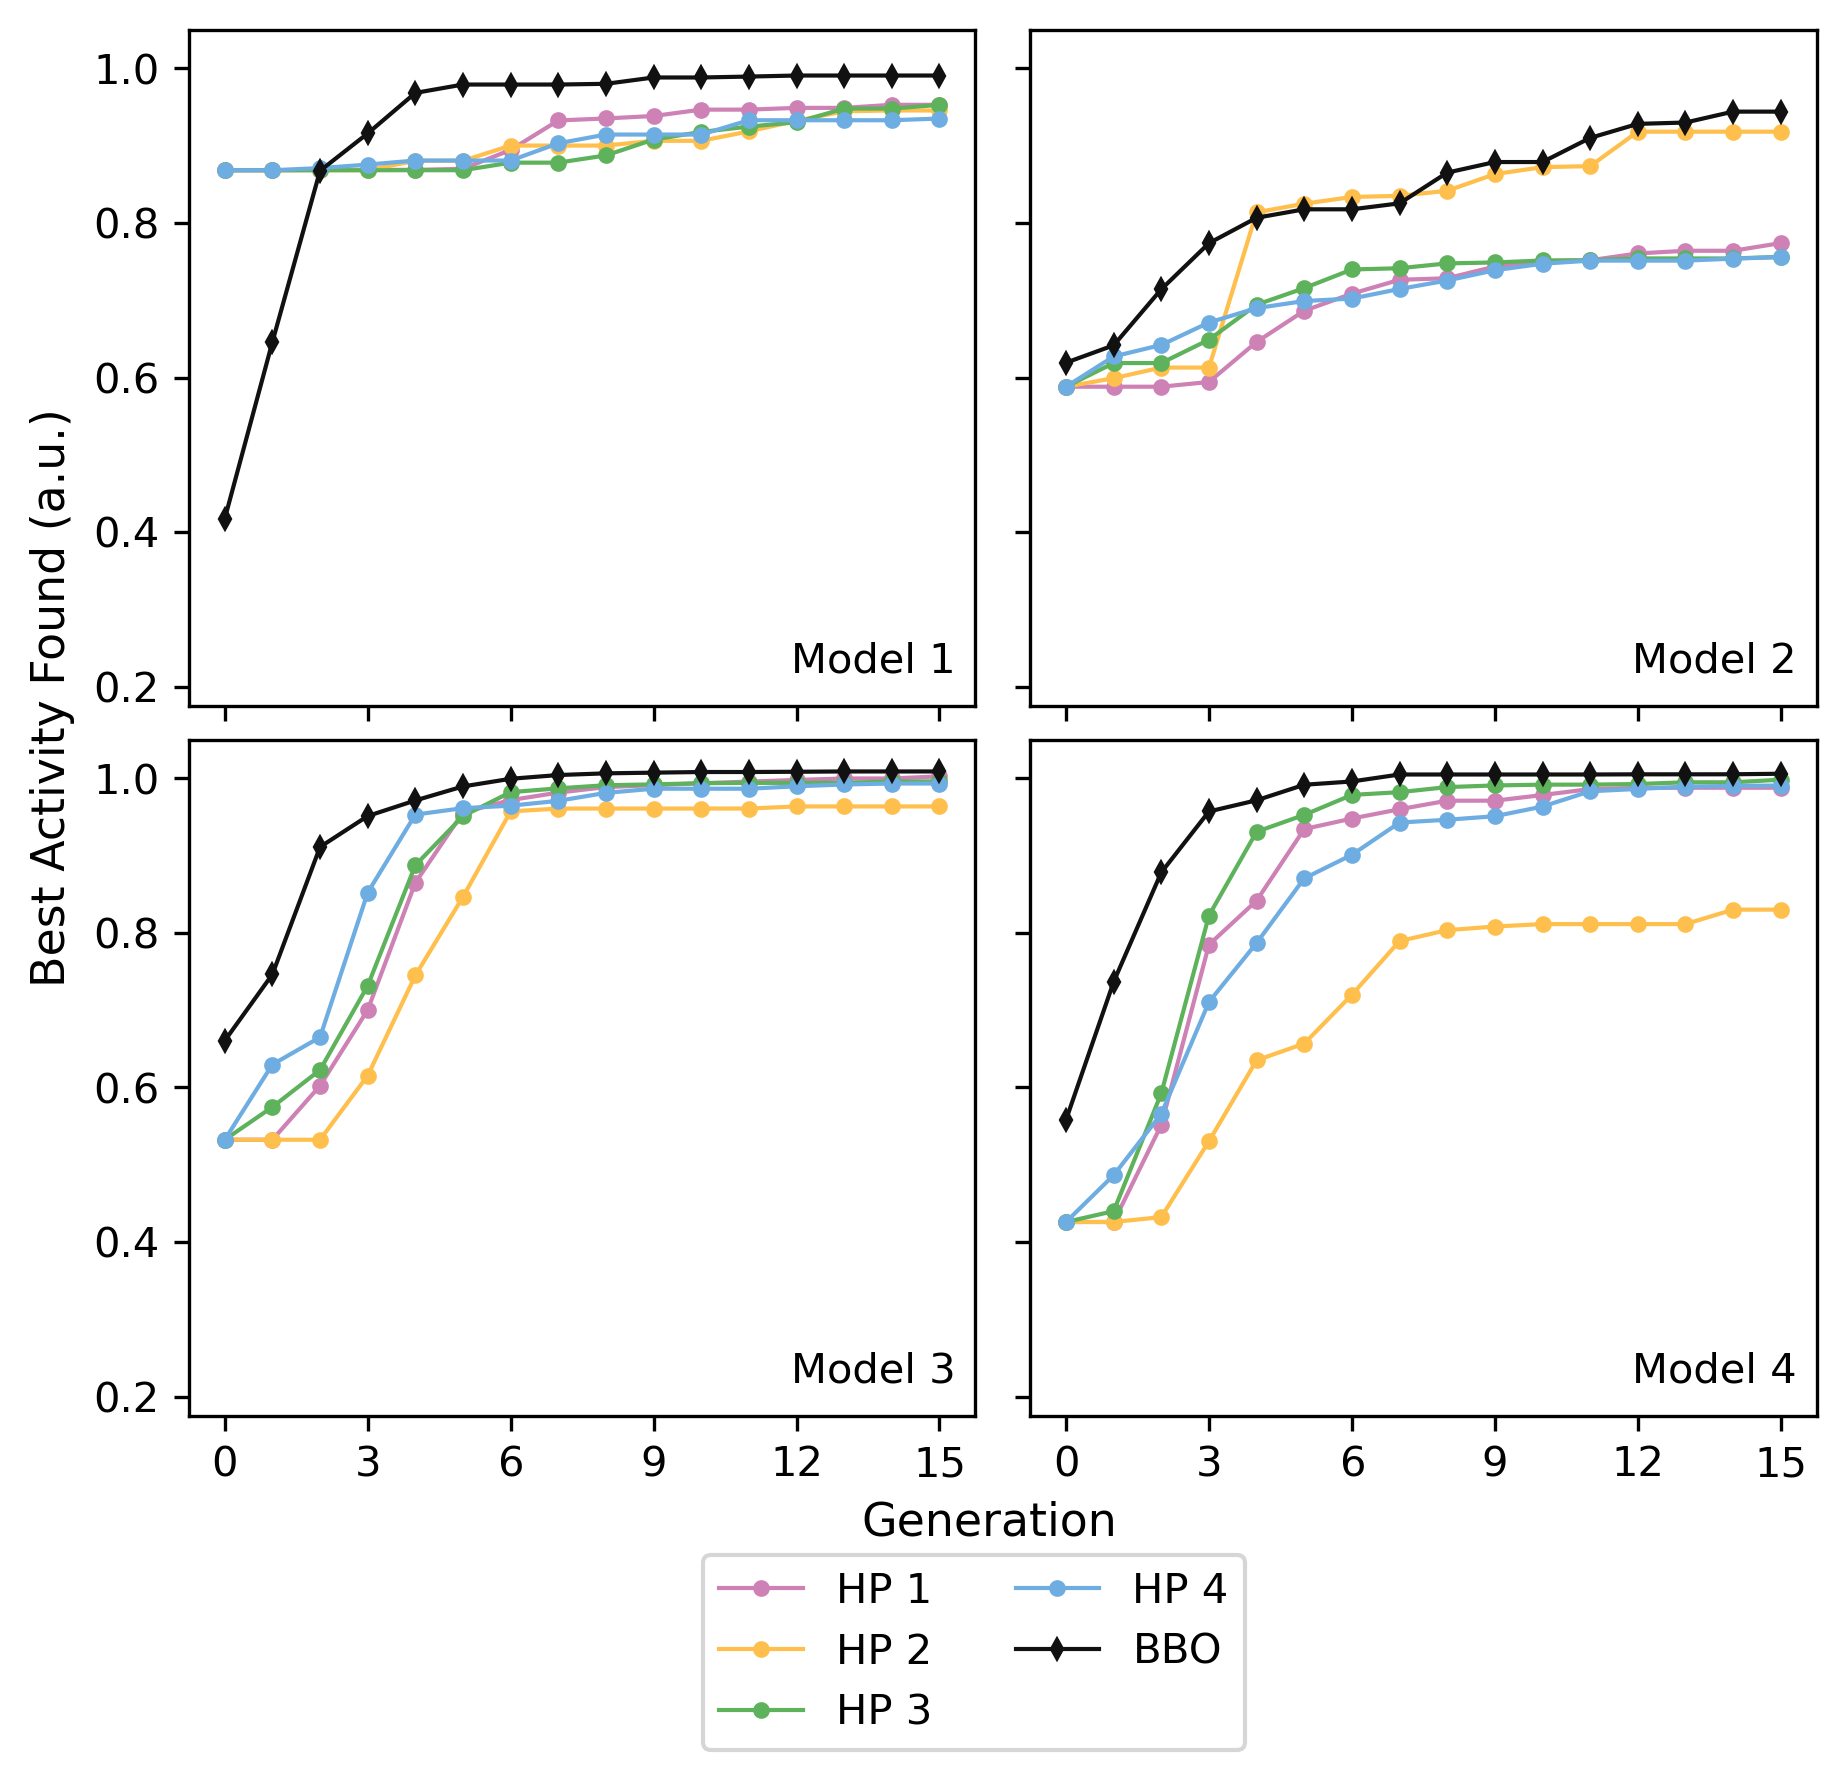

In [5]:
model_title = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
create_subplot(PSO_data_0, PSO_data_1, PSO_data_2, PSO_data_3, x_low = 0, x_high = 15, y_low = 0.175, y_high = 1.05, y_label = 'Best Activity Found')